<a href="https://colab.research.google.com/github/Treasure23-coder/github-test/blob/main/sentiment%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [11]:
import pandas as pd
df = pd.read_json("amazon_reviews.json", lines =True)

In [13]:
import re
def clean_text(text):
    text = text.lower()  # convert to lowercase for uniformity
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove digits
    text = text.strip()  # remove leading/trailing spaces
    return text

df['cleaned_review'] = df['summary'].apply(clean_text)


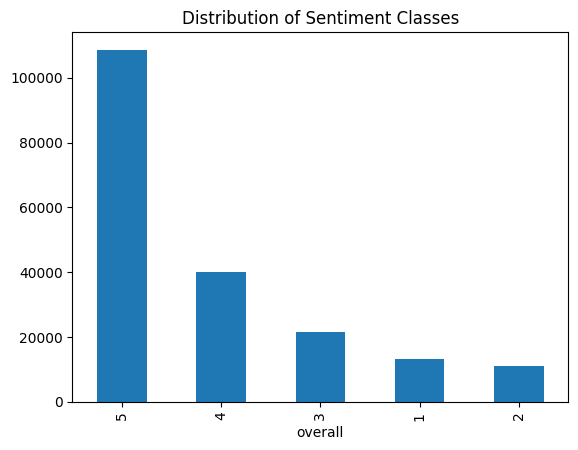

In [15]:
import matplotlib.pyplot as plt

df['overall'].value_counts().plot(kind='bar')
plt.title("Distribution of Sentiment Classes")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")

# Fit and transform your cleaned review text
X = tfidf.fit_transform(df['cleaned_review'])
y = df["summary"]

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state= 5)
#divide your data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_X, train_y)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

test1 = model.predict(test_X)

print(f"Accuracy score:{accuracy_score(test_y, test1)} ")
print(f"Classifcation_Report:{classification_report(test_y, test1)}")